<a href="https://colab.research.google.com/github/fabiomattes2016/ASMDIR/blob/master/ASMDIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ASMDIR - Sistema Automatizado para Diagnóstico Médico por Imagens Radiológicas**

***Importação das bibliotecas***

In [111]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import pandas.util.testing as tm
tf.__version__

'2.2.0-rc3'

***Carregamento da base de dados***

In [65]:
!rm -rf dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = "/content/drive/My Drive/dataset.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("./")
zip_object.close()

In [0]:
image = tf.keras.preprocessing.image.load_img(r'/content/dataset/pneumonia/train/bacteriana/person12_bacteria_48.jpeg')

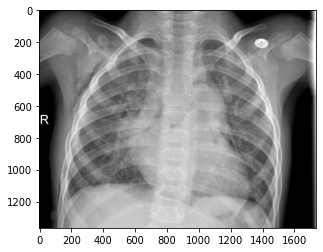

In [68]:
plt.imshow(image);

In [0]:
image = tf.keras.preprocessing.image.load_img(r'/content/dataset/pneumonia/train/normal/IM-0131-0001.jpeg')

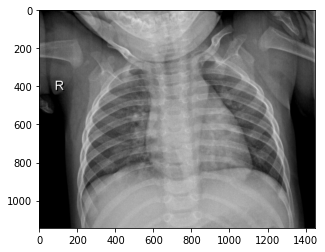

In [70]:
plt.imshow(image);

***Preparando o treinamento***

In [0]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
                                   rotation_range=50,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True)

In [72]:
train_generator = train_datagen.flow_from_directory('/content/dataset/pneumonia/train',
                                                    target_size=(224,224),
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    shuffle=True)

Found 3000 images belonging to 3 classes.


In [73]:
step_size_train = train_generator.n // train_generator.batch_size
step_size_train

187

In [0]:
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

In [75]:
test_generator = test_datagen.flow_from_directory('/content/dataset/pneumonia/test',
                                                  target_size=(224,224),
                                                  batch_size=1,
                                                  class_mode='categorical',
                                                  shuffle=False)

Found 300 images belonging to 3 classes.


In [76]:
step_size_test = test_generator.n // test_generator.batch_size
step_size_test

300

**Processos de Redes Neurais Convulocionais**

1.   Operador de convolução
2.   Pooling
3.   Flattening
4.   Rede Neural Artificial



***TransferLearning***
*   Arquitetura ResNet50



In [0]:
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False)

In [78]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [0]:
x = base_model.output

In [0]:
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [0]:
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(3, activation='softmax')(x)

In [0]:
model = tf.keras.Model(inputs=base_model.input, outputs=preds)

In [83]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [84]:
for i, layer in enumerate(model.layers):
  print(i, layer.name)

0 input_3
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [0]:
for layer in model.layers[:175]:
  layer.trainable = False

In [0]:
for layer in model.layers[175:]:
  layer.trainable = True

In [0]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [88]:
history = model.fit_generator(generator=train_generator,
                              epochs=20,
                              steps_per_epoch=step_size_train,
                              validation_data=test_generator,
                              validation_steps=step_size_test)

Epoch 1/20
187/187 [==============================] - 66s 354ms/step - loss: 0.6612 - accuracy: 0.7333 - val_loss: 0.4321 - val_accuracy: 0.8500
Epoch 2/20
187/187 [==============================] - 64s 340ms/step - loss: 0.4744 - accuracy: 0.8033 - val_loss: 0.3779 - val_accuracy: 0.8533
Epoch 3/20
187/187 [==============================] - 63s 337ms/step - loss: 0.4503 - accuracy: 0.8174 - val_loss: 0.3493 - val_accuracy: 0.8633
Epoch 4/20
187/187 [==============================] - 63s 338ms/step - loss: 0.4476 - accuracy: 0.8231 - val_loss: 0.3299 - val_accuracy: 0.8867
Epoch 5/20
187/187 [==============================] - 63s 335ms/step - loss: 0.3898 - accuracy: 0.8415 - val_loss: 0.3892 - val_accuracy: 0.8733
Epoch 6/20
187/187 [==============================] - 63s 340ms/step - loss: 0.3855 - accuracy: 0.8418 - val_loss: 0.3417 - val_accuracy: 0.8967
Epoch 7/20
187/187 [==============================] - 63s 337ms/step - loss: 0.3903 - accuracy: 0.8385 - val_loss: 0.6801 - val_ac

In [0]:
model.save_weights('weights.h5')
model.save('model.h5')

***Avaliação***

In [90]:
np.mean(history.history['val_accuracy'])

0.8421666651964188

In [91]:
np.std(history.history['val_accuracy'])

0.0519323839733854

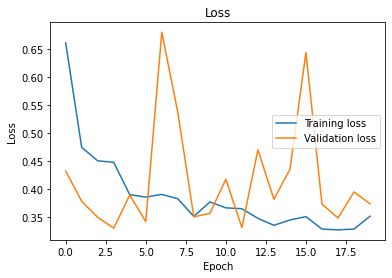

In [92]:
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend();

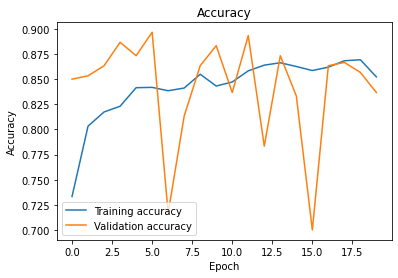

In [93]:
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend();

***Previsões***

In [0]:
from tensorflow.keras.models import load_model
model = load_model('/content/model.h5')

In [98]:
filenames = test_generator.filenames
filenames

['bacteriana/person100_bacteria_475.jpeg',
 'bacteriana/person100_bacteria_477.jpeg',
 'bacteriana/person100_bacteria_478.jpeg',
 'bacteriana/person100_bacteria_479.jpeg',
 'bacteriana/person100_bacteria_480.jpeg',
 'bacteriana/person100_bacteria_481.jpeg',
 'bacteriana/person100_bacteria_482.jpeg',
 'bacteriana/person101_bacteria_483.jpeg',
 'bacteriana/person101_bacteria_484.jpeg',
 'bacteriana/person101_bacteria_485.jpeg',
 'bacteriana/person101_bacteria_486.jpeg',
 'bacteriana/person102_bacteria_487.jpeg',
 'bacteriana/person103_bacteria_488.jpeg',
 'bacteriana/person103_bacteria_489.jpeg',
 'bacteriana/person103_bacteria_490.jpeg',
 'bacteriana/person104_bacteria_491.jpeg',
 'bacteriana/person104_bacteria_492.jpeg',
 'bacteriana/person108_bacteria_504.jpeg',
 'bacteriana/person108_bacteria_506.jpeg',
 'bacteriana/person108_bacteria_507.jpeg',
 'bacteriana/person108_bacteria_511.jpeg',
 'bacteriana/person109_bacteria_512.jpeg',
 'bacteriana/person109_bacteria_513.jpeg',
 'bacterian

In [99]:
len(filenames)

300

In [100]:
predictions = model.predict_generator(test_generator, steps=len(filenames))

Instructions for updating:
Please use Model.predict, which supports generators.


In [101]:
predictions

array([[1.02735527e-01, 8.11272204e-01, 8.59922618e-02],
       [6.95752680e-01, 2.66617304e-03, 3.01581174e-01],
       [7.34948874e-01, 2.98451982e-04, 2.64752686e-01],
       [5.55967629e-01, 1.88629217e-02, 4.25169498e-01],
       [4.39927965e-01, 6.95546046e-02, 4.90517348e-01],
       [3.07087809e-01, 3.68280262e-01, 3.24631900e-01],
       [5.99519968e-01, 2.10609590e-03, 3.98373961e-01],
       [8.73385906e-01, 1.82452168e-05, 1.26595810e-01],
       [9.11756158e-01, 6.17542764e-06, 8.82376283e-02],
       [7.57362127e-01, 2.58483062e-03, 2.40053058e-01],
       [6.88828170e-01, 3.91182955e-04, 3.10780644e-01],
       [8.66775095e-01, 3.90533351e-05, 1.33185819e-01],
       [8.91891062e-01, 3.93359323e-06, 1.08105056e-01],
       [8.71937096e-01, 2.07817830e-05, 1.28042117e-01],
       [8.94908547e-01, 3.52605252e-06, 1.05087899e-01],
       [7.26552188e-01, 2.58355727e-03, 2.70864278e-01],
       [6.30430818e-01, 1.95942412e-04, 3.69373322e-01],
       [7.61320353e-01, 7.43768

In [102]:
len(predictions)

300

In [0]:
predictions2 = []
for i in range(len(predictions)):
  predictions2.append(np.argmax(predictions[i]))

In [104]:
predictions2

[1,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [105]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

In [106]:
test_generator.class_indices

{'bacteriana': 0, 'normal': 1, 'viral': 2}

In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(predictions2, test_generator.classes)

0.6766666666666666

In [108]:
cm = confusion_matrix(predictions2, test_generator.classes)
cm

array([[63,  0, 28],
       [22, 73,  5],
       [15, 27, 67]])

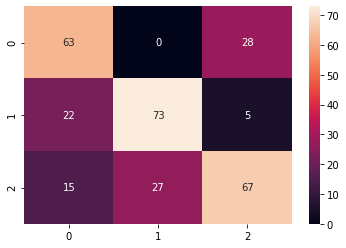

In [112]:
sns.heatmap(cm, annot=True);

***Testando Imagem***

In [0]:
image = tf.keras.preprocessing.image.load_img(r'/content/dataset/pneumonia/test/viral/person17_virus_48.jpeg', target_size=(224,224))

In [149]:
type(image)

PIL.Image.Image

In [150]:
image = tf.keras.preprocessing.image.img_to_array(image)
np.shape(image)

(224, 224, 3)

In [151]:
np.max(image), np.min(image)

(255.0, 0.0)

In [152]:
image = np.expand_dims(image, axis=0)
np.shape(image)

(1, 224, 224, 3)

In [0]:
image = tf.keras.applications.resnet50.preprocess_input(image)

In [154]:
np.max(image), np.min(image)

(151.061, -123.68)

In [155]:
predictions = model.predict(image)
print(predictions)

[[0.0430122  0.02380761 0.9331802 ]]


In [156]:
predictions[0]

array([0.0430122 , 0.02380761, 0.9331802 ], dtype=float32)

In [157]:
np.argmax(predictions[0])

2

In [158]:
list(train_generator.class_indices)

['bacteriana', 'normal', 'viral']

In [159]:
prediction = list(train_generator.class_indices)[np.argmax(predictions[0])]
prediction

'viral'